# Logistic Regression without sklearn

## Import Dataset And Pre-pocess

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def loadDataSet():
    dataMat = []                                                        #创建数据列表
    labelMat = []                                                       #创建标签列表
    fr = open('04_1.txt')                                               #打开文件   
    for line in fr.readlines():                                         #逐行读取
        lineArr = line.strip().split()                                  #去回车，放入列表
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])     #特征数据集添加 1，构造常数项x0
        labelMat.append(int(lineArr[-1]))                               #在最后一列添加标签
    fr.close()                                                          #关闭文件
    return dataMat, labelMat                                            #返回

In [3]:
# loadDataSet()

In [4]:
import pandas as pd
dataset = pd.read_csv("04_1.txt", delimiter="\t", header=None)
dataset

,0,1,2
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1
2,-0.752157,6.538620,0
3,-1.322371,7.152853,0
4,0.423363,11.054677,0
...,...,...,...
95,0.677983,2.556666,1
96,0.761349,10.693862,0
97,-2.168791,0.143632,1
98,1.388610,9.341997,0


## Data Visualization

In [5]:
def plotDataSet():
    dataMat, labelMat = loadDataSet()                                    #加载数据集
    dataArr = np.array(dataMat)                                          #转换成numpy的array数组
    n = np.shape(dataMat)[0]                                             #数据个数
    xcord1 = []; ycord1 = []                                             #正样本
    xcord2 = []; ycord2 = []                                             #负样本
    for i in range(n):                                                   #根据数据集标签进行分类
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])     #1为正样本
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])     #0为负样本
    fig = plt.figure()
    ax = fig.add_subplot(111)                                            #添加subplot
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's',alpha=.5) #绘制正样本
    ax.scatter(xcord2, ycord2, s = 20, c = 'green',alpha=.5)             #绘制负样本
    plt.title('DataSet')                                                 #绘制title
    plt.xlabel('x'); plt.ylabel('y')                                     #绘制label
    plt.show()                                                           #显示

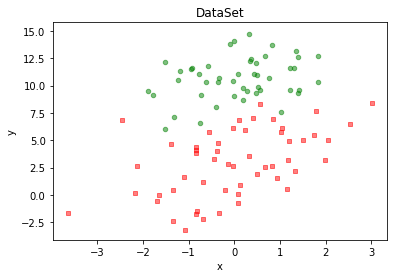

In [6]:
plotDataSet()

## Sigmoid Function

In [7]:
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

(-0.2, 1.2)

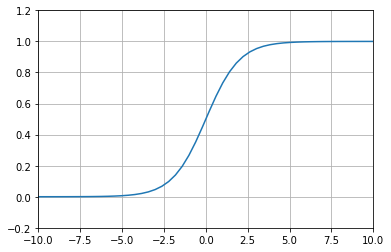

In [8]:
x1 = np.linspace(-20, 20, 100)  # x1 ∈ (-∞，+∞)
y1 = sigmoid(x1)                # y1 ∈ (0，1)
plt.plot(x1, y1)
plt.grid()
plt.xlim(-10, 10)
plt.ylim(-0.2, 1.2)

## Train Algorithm
Use **Gradient Ascent** to solve coefficents [w0,w1,w2]

In [9]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)                                        #转换成numpy的mat
    labelMat = np.mat(classLabels).transpose()                            #转换成numpy的mat,并进行转置
    m, n = np.shape(dataMatrix)                                           #返回dataMatrix的大小。m为行数,n为列数。
    alpha = 0.001                                                         #移动步长,也就是学习速率,控制更新的幅度。
    maxCycles = 500                                                       #最大迭代次数
    weights = np.ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)                                 #梯度上升矢量化公式
        error = labelMat - h
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights.getA()                                                 #将矩阵转换为数组，返回权重数组

In [10]:
dataMat, labelMat = loadDataSet()           
print(gradAscent(dataMat, labelMat))

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


### An Example for Gradient Ascent
When does y = -2x^2 + 4 get the maxmimun?

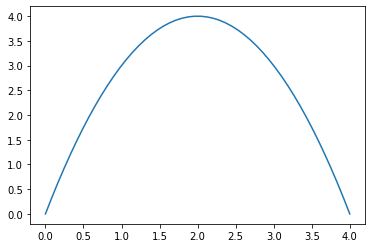

In [11]:
x = np.linspace(0.0, 4.0, 50)
y = -x**2 + 4*x
plt.plot(x,y)

### Answer to Example
$$f(x) = -x^{2} + 4x$$
    
$$f'(x) = -2x + 4$$

$$x_{i+1} = x_{i} + \alpha * \frac{\partial f(x_{i})}{\partial x_{i}}$$

In [12]:
def Gradient_Ascent_test():
    def f_prime(x_old):                                   #f(x)的导数
        return -2 * x_old + 4
    x_old = -1                                            #初始值，给一个小于x_new的值
    x_new = 0                                             #梯度上升算法初始值，即从(0,0)开始
    alpha = 0.01                                          #步长，也就是学习速率，控制更新的幅度
    precison = 0.00000001                                 #精度，也就是更新阈值
    while abs(x_new - x_old) > precison:
        x_old = x_new
        x_new = x_old + alpha * f_prime(x_old)            #上面提到的公式
    print(x_new)                                          #打印最终求解的极值近似值

In [13]:
Gradient_Ascent_test()

1.999999515279857


## Test Algorithm
Plot the decision boundary

In [14]:
def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()                                    #加载数据集
    dataArr = np.array(dataMat)                                          #转换成numpy的array数组
    n = np.shape(dataMat)[0]                                             #数据个数
    xcord1 = []; ycord1 = []                                             #正样本
    xcord2 = []; ycord2 = []                                             #负样本
    for i in range(n):                                                   #根据数据集标签进行分类
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])     #1为正样本
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])     #0为负样本
    fig = plt.figure()
    ax = fig.add_subplot(111)                                            #添加subplot
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's',alpha=.5) #绘制正样本
    ax.scatter(xcord2, ycord2, s = 20, c = 'green',alpha=.5)             #绘制负样本
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.title('BestFit')                                                 #绘制title
    plt.xlabel('X1'); plt.ylabel('X2')                                   #绘制label
    plt.show()       

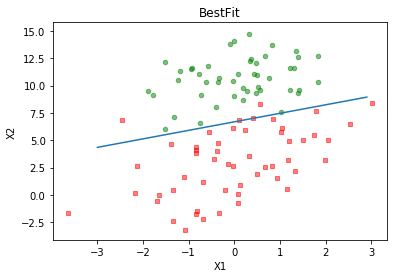

In [15]:
dataMat, labelMat = loadDataSet()           
weights = gradAscent(dataMat, labelMat)
plotBestFit(weights)

# Comparison for Gradient Ascent Algorithm

## The above algorithm: Gradient Ascent
- There are 100 samples in dataset, dataMatrix is 100×3. It needs to use the whole dataset to compute and updata parameters.
- It's impossible to deat wiht a large amount of data.

In [16]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)                                        #转换成numpy的mat
    labelMat = np.mat(classLabels).transpose()                            #转换成numpy的mat,并进行转置
    m, n = np.shape(dataMatrix)                                           #返回dataMatrix的大小。m为行数,n为列数。
    alpha = 0.01                                                          #移动步长,也就是学习速率,控制更新的幅度。
    maxCycles = 500                                                       #最大迭代次数
    weights = np.ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)                                 #梯度上升矢量化公式
        error = labelMat - h
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights.getA(),weights_array                                   #将矩阵转换为数组，返回权重数组

## Stochastic Gradient Descent
- Only use one sample to compute and updat parameters. It can save much time but it's easy to cause underfitting.

In [17]:
def stocGradAscent(dataMatrix,classLabels):
    m,n=shape(dataMatrix)
    alpha=0.01
    weights=ones(n)
    for i in range(m):
        h=sigmoid(sum(dataMatrix[i] * weights))                          # 数值计算
        error = classLabels[i]-h
        weights=weights + alpha * error * dataMatrix[i]                  # array 和 list 矩阵乘法不一样
    return weights

## Improved Stochastic Gradient Descent
- Alpha always becomes smaller during every iteration.

In [18]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = np.shape(dataMatrix)                                           # 返回dataMatrix的大小。m为行数,n为列数。
    weights = np.ones(n)                                                 # 参数初始化
    for j in range(numIter):                                           
        dataIndex = list(range(m))
        for i in range(m):           
            alpha = 4/(1.0+j+i)+0.01                                     # 降低alpha的大小，每次减小1/(j+i)。
            randIndex = int(random.uniform(0,len(dataIndex)))            # 随机选取样本
            h = sigmoid(sum(dataMatrix[randIndex]*weights))              # 选择随机选取的一个样本，计算h
            error = classLabels[randIndex] - h                           # 计算误差
            weights = weights + alpha * error * dataMatrix[randIndex]    # 更新回归系数
            del(dataIndex[randIndex])                                    # 删除已经使用的样本
    return weights                                                       # 返回

## Summary
- We use Gradient Ascent when dataset is small.
- We use Improved Gradient Ascent when dataset is big.

# Logistic Regression with Sklearn

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
def colicSklearn():
    frTrain = open('04_2horseColicTraining.txt')                                        
    frTest = open('04_3horseColicTest.txt')                                             
    trainingSet = []; trainingLabels = []
    testSet = []; testLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(len(currLine)-1):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[-1]))
    for line in frTest.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(len(currLine)-1):
            lineArr.append(float(currLine[i]))
        testSet.append(lineArr)
        testLabels.append(float(currLine[-1]))
    classifier = LogisticRegression(solver='liblinear',max_iter=100).fit(trainingSet, trainingLabels)
    test_accurcy = classifier.score(testSet, testLabels) * 100
    print('Correct rate:%f%%' % test_accurcy)                          #定义分类函数，prob>0.5，则分入1，否则分类0

In [21]:
if __name__ == '__main__':
    colicSklearn()

Correct rate:73.134328%


<https://github.com/zotroneneis/machine_learning_basics/blob/master/logistic_regression.ipynb>